In [2]:
# Install virtualenv
!pip install virtualenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 44.2 MB/s eta 0:00:00


In [3]:
# Create a virtual environment named 'venv'
!virtualenv venv

created virtual environment CPython3.10.12.final.0-64 in 850ms
  creator CPython3Posix(dest=/content/venv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.2.1, setuptools==68.2.0, wheel==0.41.2
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [4]:
# Activate the virtual environment
!source venv/bin/activate

In [5]:
# Install PyTorch and related libraries
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

# Install Ultralytics
!pip install ultralytics

Looking in indexes: https://download.pytorch.org/whl/cu117
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.9/618.9 kB 9.2 MB/s eta 0:00:00


In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="EOhYeu8RILOUCwNNmkxQ")
project = rf.workspace("multipipedetection").project("pipe-classification")
dataset = project.version(15).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled 

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.195, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Pipe--classification-15 in yolov8:: 100%|██████████| 902/902 [00:00<00:00, 2940.61it/s]


In [7]:
from ultralytics import YOLO

if __name__ == "__main__":
    # load a model
    model = YOLO("yolov8n.yaml")
    model = YOLO("yolov8n.pt")

    # Set batch size and image size
    batch_size = 4  # adjust as needed
    img_size = 320  # adjust as needed

    # train the model
    results = model.train(data="/content/Pipe--classification-15/data.yaml", epochs=25, batch=batch_size, imgsz=img_size)



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [13]:
from sklearn.metrics import precision_recall_curve, confusion_matrix
# Evaluate the model on the validation set
results_val = model.val(data="/content/Pipe--classification-15/data.yaml", imgsz=img_size)









Ultralytics YOLOv8.0.195 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/Pipe--classification-15/valid/labels.cache... 35 images, 0 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/Pipe--classification-15/valid/images/k-13-_jpg.rf.7aab9c4fa45d1c38ef90bf9938e00e26.jpg: 17 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:47<00:00,  5.29s/it]
                   all         35      30404      0.669      0.213      0.319      0.199
              C 48 2.5         35        915      0.578      0.383      0.325      0.139
              C 48 3.2         35       2578          1          0          0          0
              C 60 3.2         35          1          0          0          0          0
              C 89 3.6         35        164       0.58      0.606      0.598      0.408
           R 20 40 1.2         35       9683

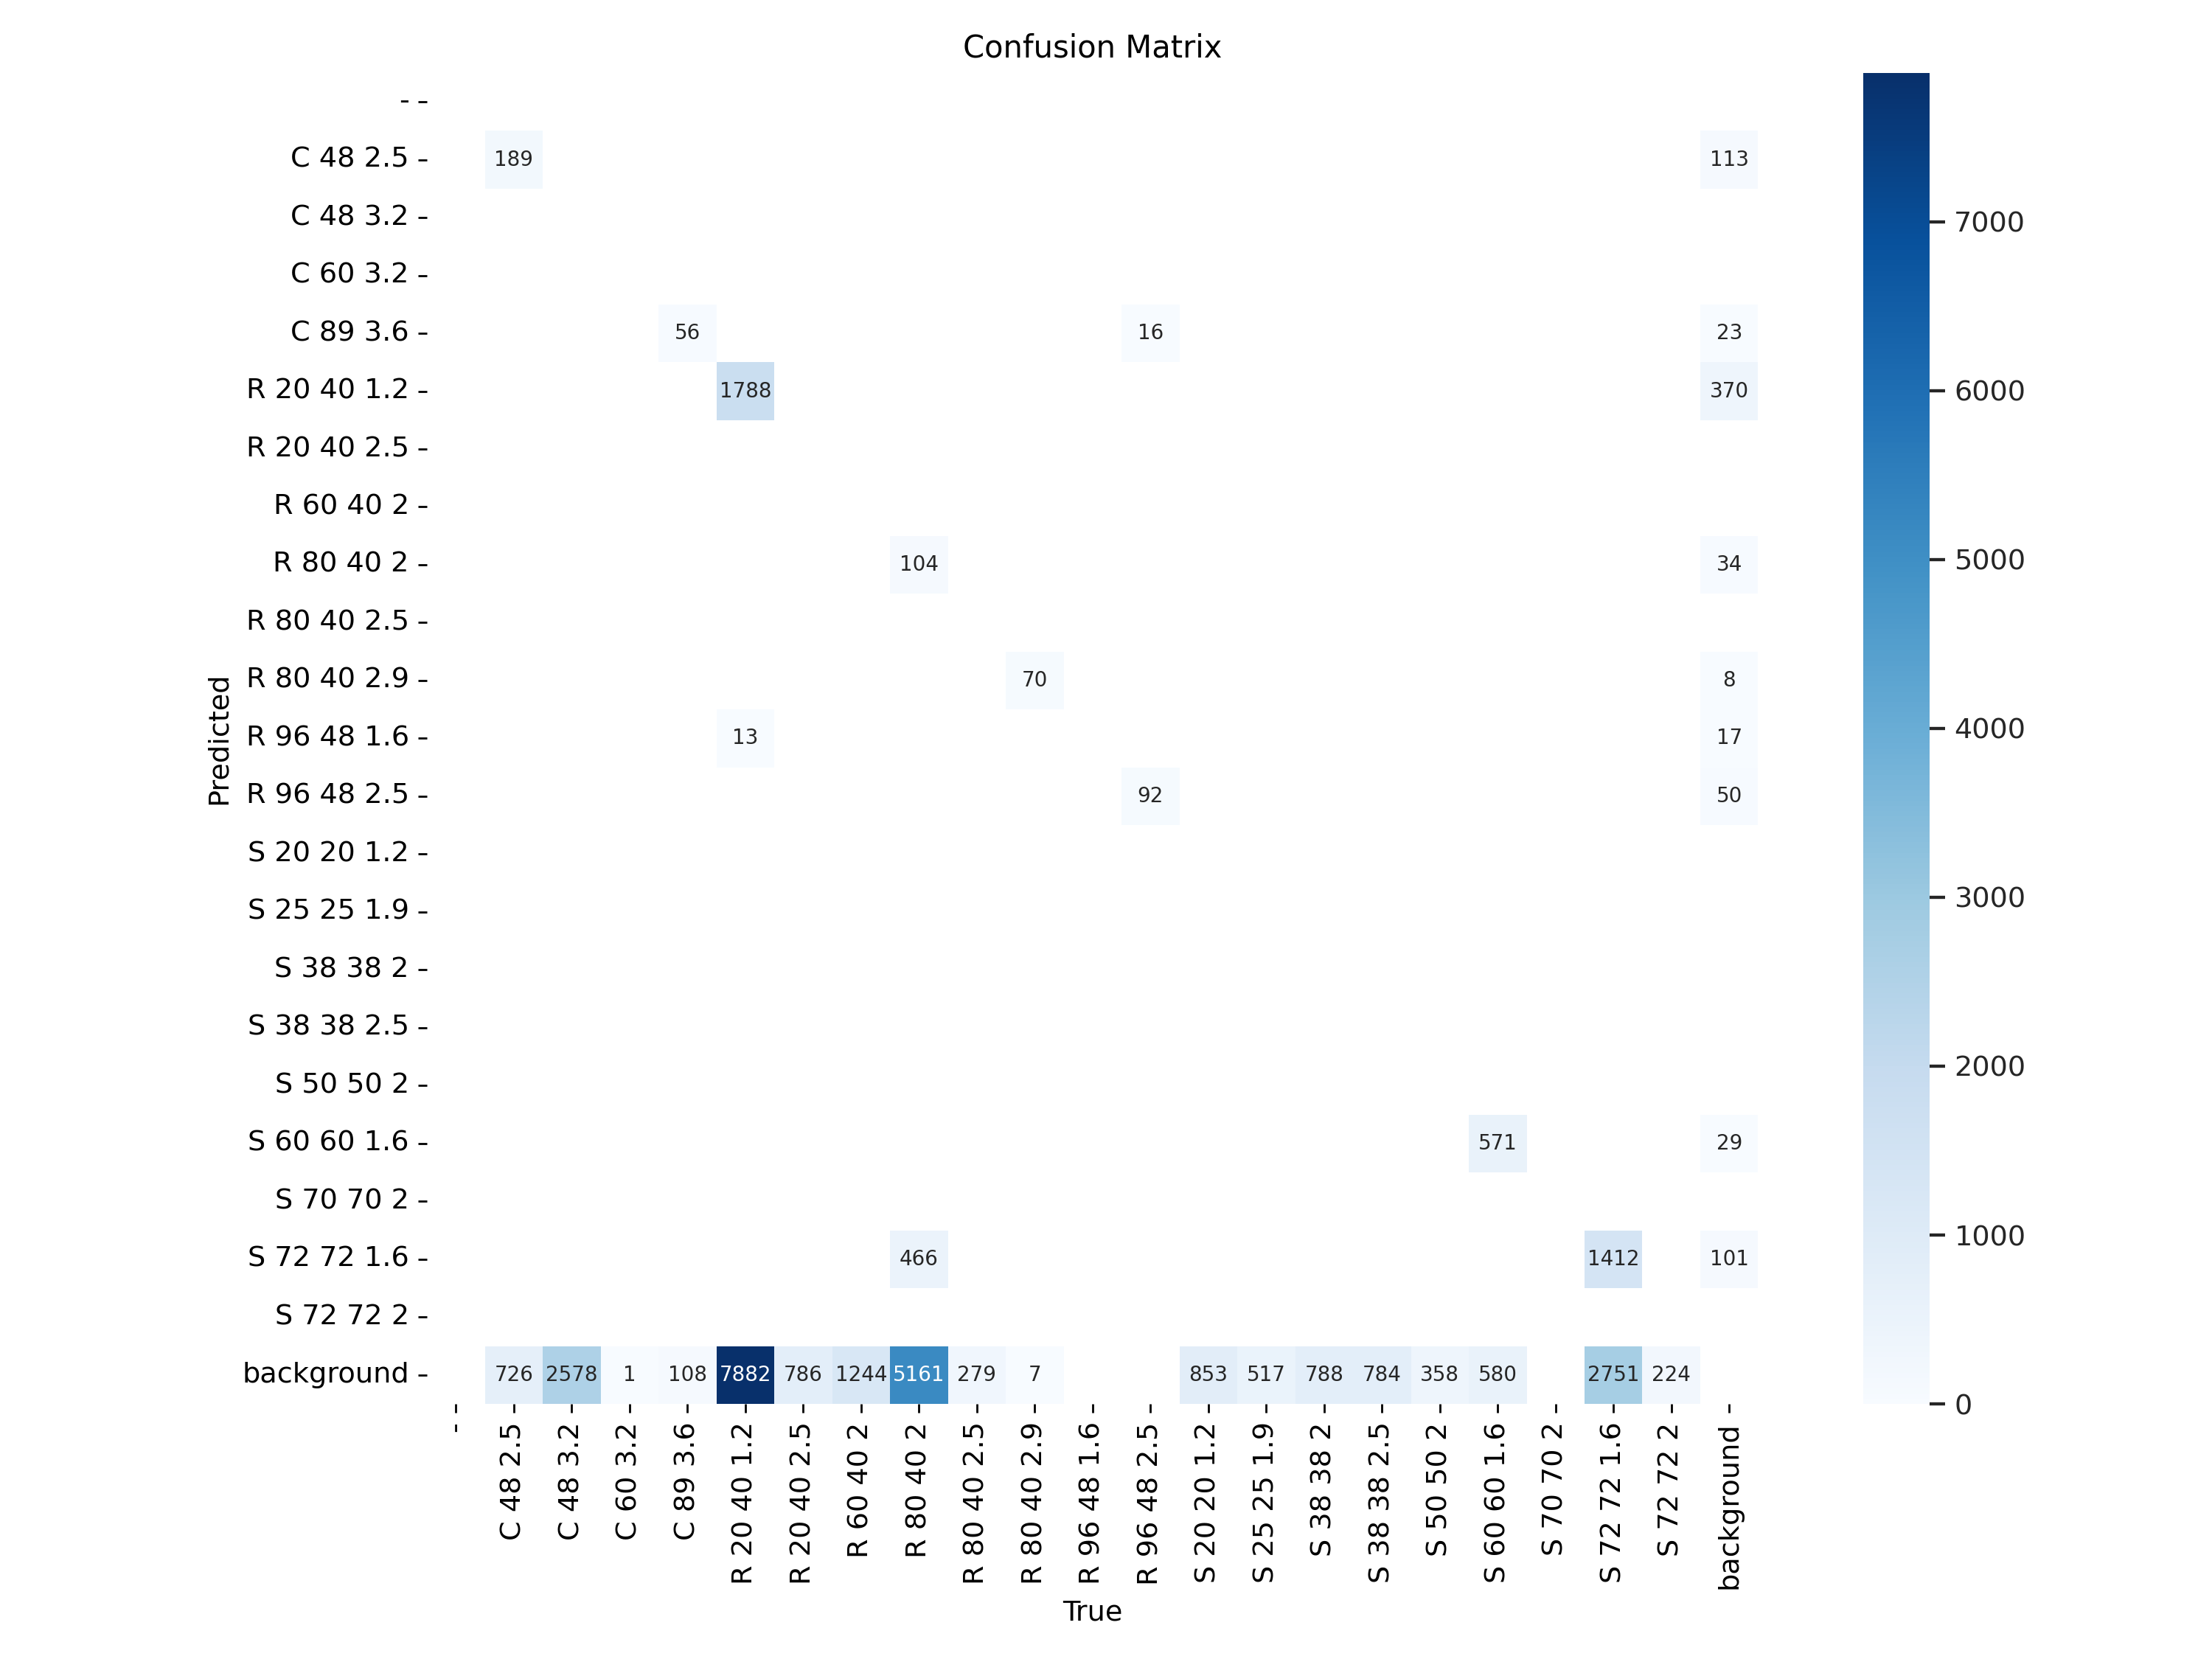

In [45]:
# Display the confusion matrix image
from IPython.display import display, Image
# Display the confusion matrix image
display(Image(filename='/content/runs/detect/train/confusion_matrix.png'))


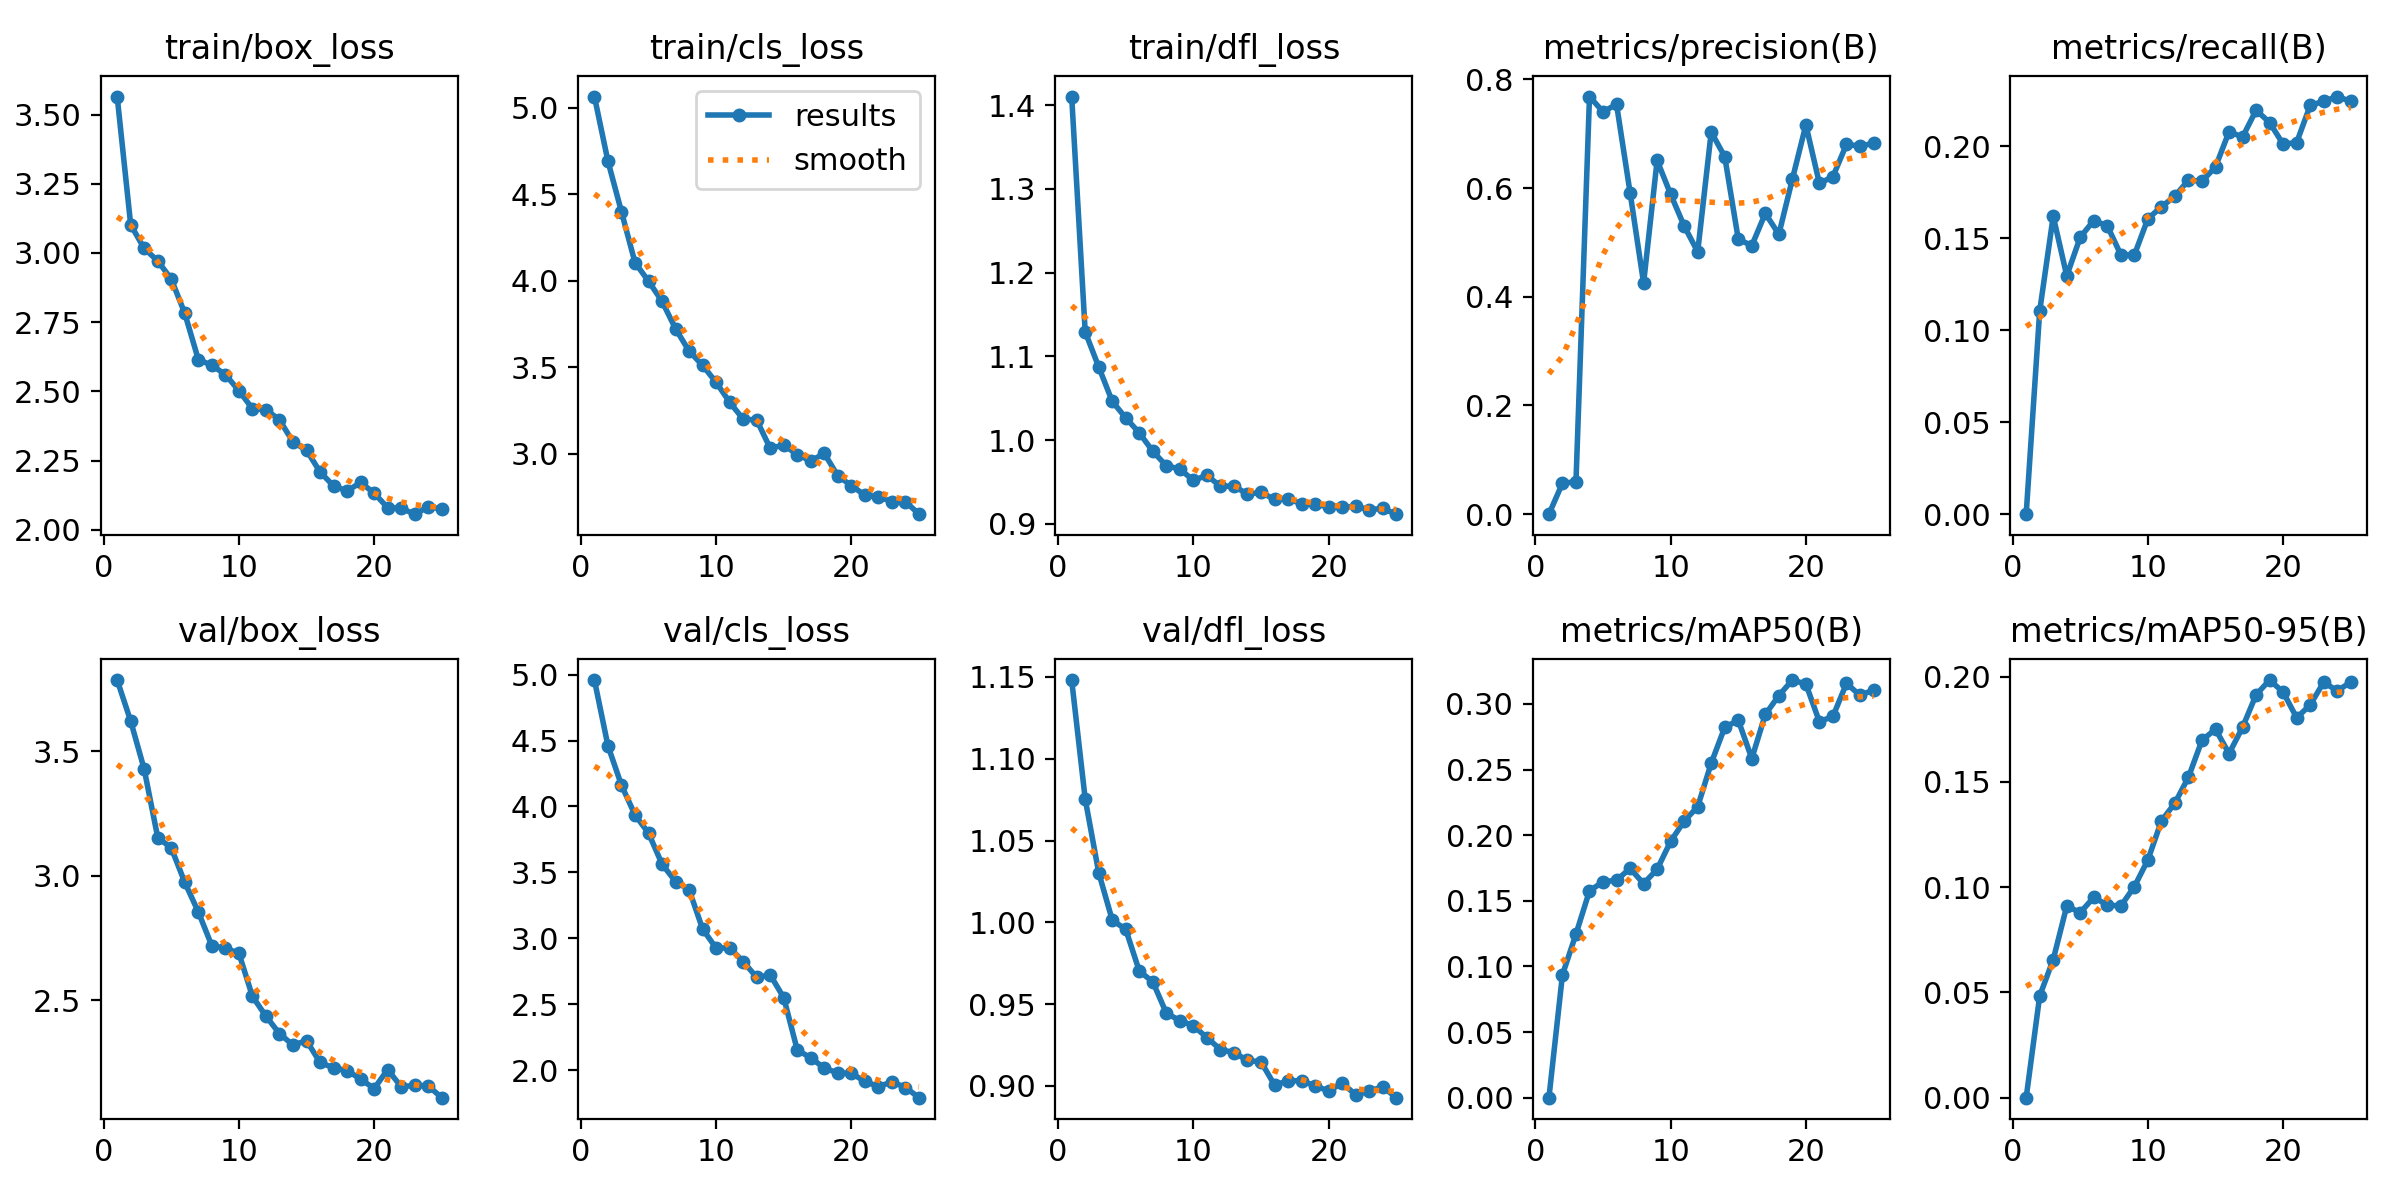

In [46]:
display(Image(filename='/content/runs/detect/train/results.png'))

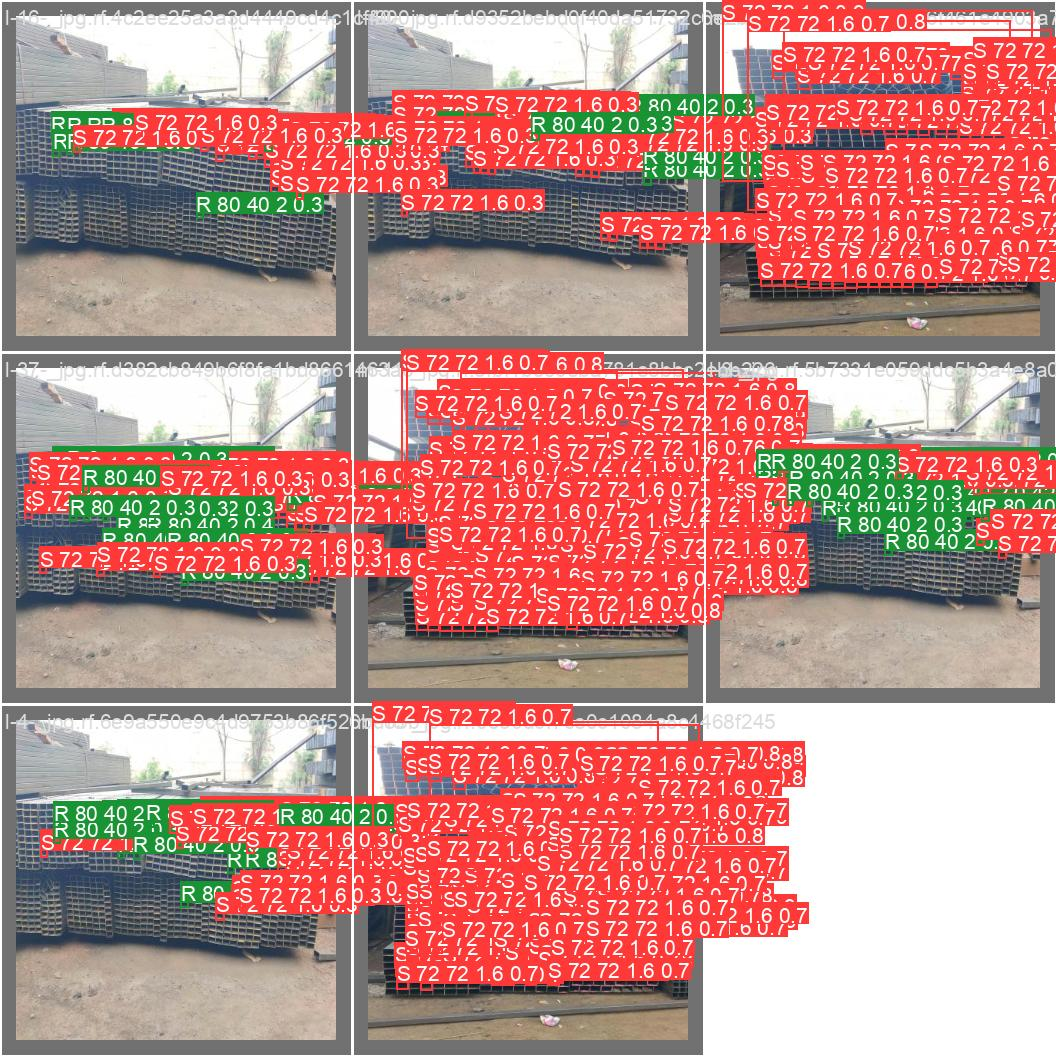

In [47]:
display(Image(filename='/content/runs/detect/train/val_batch1_pred.jpg'))


image 1/1 /content/Pipe--classification-15/valid/images/b-50-_jpg.rf.43c64a41ac98b88be040821fa97eb777.jpg: 320x320 69 C 48 2.5s, 28.5ms
Speed: 1.3ms preprocess, 28.5ms inference, 2.6ms postprocess per image at shape (1, 3, 320, 320)


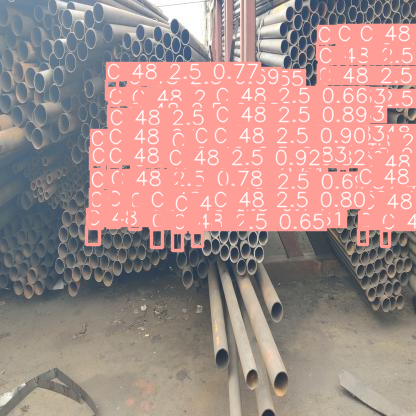

error: ignored

In [42]:
import os
import random
from ultralytics import YOLO
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

# pick random picture
dir = '/content/Pipe--classification-15/valid/images'
filename = random.choice(os.listdir(dir))
path = os.path.join(dir, filename)

# load best model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# predict
results = model.predict(source=path, save=False,  conf=0.5)

# show result
res_plotted = results[0].plot()
cv2_imshow(res_plotted)
cv2.waitKey(0)
cv2.destroyAllWindows()